Speech to Image

The following code can generate an image from an audio sample using pre-trained OpenAI whisper-small and Stable Diffusion. The script was contributed by [Mikhail Duzenli](https://github.com/MikailINTech) and the notebook by [Parag Ekbote](https://github.com/ParagEkbote).

In [3]:
pip install datasets matplotlib diffusers transformers torch librosa soundfile

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 105.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 175.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.9/43.9 MB 194.7 MB/s eta 0:00:0000:01
Note: you may need to restart the kernel to use updated packages.


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

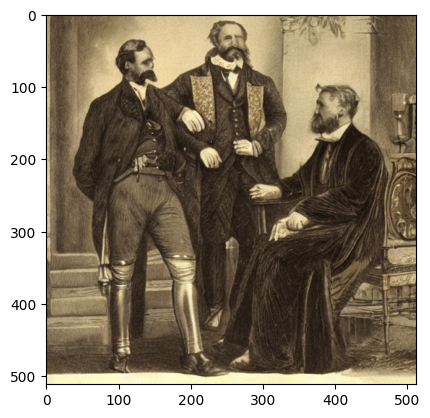

In [13]:
#!/usr/bin/env python3
import torch
import matplotlib.pyplot as plt
from datasets import load_dataset
from diffusers import DiffusionPipeline
from transformers import (
    WhisperForConditionalGeneration,
    WhisperProcessor,
)


# Load the model and move it to the correct device
model = WhisperForConditionalGeneration.from_pretrained("openai/whisper-small")
processor = WhisperProcessor.from_pretrained("openai/whisper-small")

# Load the dataset
ds = load_dataset("hf-internal-testing/librispeech_asr_dummy", "clean", split="validation")

# Get a sample from the dataset
audio_sample = ds[3]

# Prepare the data
text = audio_sample["text"].lower()
speech_data = audio_sample["audio"]["array"]

# Load the Diffusion Pipeline
diffuser_pipeline = DiffusionPipeline.from_pretrained(
    "CompVis/stable-diffusion-v1-4",
    custom_pipeline="speech_to_image_diffusion",
    speech_model=model,
    speech_processor=processor,
    torch_dtype=torch.float32,
)
diffuser_pipeline.enable_attention_slicing()

# Generate the image
output = diffuser_pipeline(speech_data)
plt.imshow(output.images[0])
plt.show()
